In [2]:
import numpy as np
def create_cities(number_cities):
    cities = np.random.uniform(low=0, high=1, size=(number_cities, 3))
    return cities
def calculate_distance(point_1,point_2):
    distance = np.sqrt(((point_2[0]-point_1[0])**2)+((point_2[1]-point_1[1])**2)+((point_2[2]-point_1[2])**2))
    return distance

In [3]:
def ant_colony_optimization(cities, n_ants, n_iterations, alpha, beta, evaporation_rate, Q):
    """
    This function solves the Traveling Salesman Problem using Ant Colony Optimization.

    Parameters:
    - cities (list): List of cities.
    - n_ants (int): Number of ants.
    - n_iterations (int): Number of iterations.
    - alpha (float): It determines how much the ants are influenced by the pheromone trails left by other ants.
    - beta (float):  It determines how much the ants are influenced by the distance to the next city
    - evaporation_rate (float): Evaporation rate.
    - Q (float): It determines the intensity of the pheromone trail left behind by an ant.
    """

    number_cities = len(cities)
    pheromone = np.ones((number_cities,number_cities))
    
    # initialize output metrics
    best_path = None
    best_path_length = np.inf

    # per each iteration the ants will build a path
    for iteration in range(n_iterations):
        paths = []  # store the paths of each ant
        path_lengths = []

        for ant in range(n_ants):
            visited = [False] * number_cities

            # you could start from any city, but let's start from a random one
            current_city = np.random.randint(number_cities)
            visited[current_city] = True
            path = [current_city]
            path_length = 0

            while False in visited:  # while there are unvisited cities
                unvisited = np.where(np.logical_not(visited))[0]
                probabilities = np.zeros(len(unvisited))

                # based on pheromone, distance and alpha and beta parameters, define the preference
                # for an ant to move to a city
                for i, unvisited_city in enumerate(unvisited):
                    probabilities[i]= (pheromone[current_city,unvisited_city]*alpha)/(calculate_distance(cities[current_city],cities[unvisited_city])*beta)
                    
                # normalize probabilities, it means, the sum of all probabilities is 1
                # HERE add normalization for calculated probabilities
                probabilities /= np.sum(probabilities)
                
                next_city = np.random.choice(unvisited, p=probabilities)
                path.append(next_city)
                # increase the cost of move through the path
                path_length += calculate_distance(
                    cities[current_city], cities[next_city]
                )
                visited[next_city] = True
                # move to the next city, for the next iteration
                current_city = next_city

            paths.append(path)
            path_lengths.append(path_length)

            # update with current best path, this is a minimization problem
            if path_length < best_path_length:
                best_path = path
                best_path_length = path_length

        # remove a bit of pheromone of all map, it's a way to avoid local minima
        pheromone *= evaporation_rate

        # current ant must add pheromone to the path it has walked
        for path, path_length in zip(paths, path_lengths):
            for i in range(number_cities - 1):
                pheromone[path[i], path[i + 1]] += Q / path_length
            pheromone[path[-1], path[0]] += Q / path_length
    return best_path, best_path_length

In [16]:
# model parameters
number_cities = 100
number_ants = 100
number_iterations = 100
alpha = 1
beta = 0.5
evaporation_rate = 0.5
Q = 1

# HERE create list of cities
cities = create_cities(number_cities)

# HERE call ant_colony_optimization function

best_path, best_path_length = ant_colony_optimization(cities,number_ants,number_iterations,alpha,beta,evaporation_rate,Q)


Best path: [48, 81, 71, 73, 43, 30, 8, 3, 78, 96, 51, 41, 24, 56, 17, 32, 74, 16, 9, 85, 33, 67, 45, 86, 59, 72, 62, 80, 22, 55, 57, 2, 98, 18, 5, 31, 19, 91, 25, 79, 37, 52, 20, 13, 26, 4, 15, 69, 34, 99, 60, 77, 28, 58, 1, 64, 76, 23, 54, 75, 27, 68, 46, 10, 65, 7, 21, 83, 50, 47, 97, 89, 11, 49, 42, 66, 84, 63, 95, 94, 88, 90, 39, 70, 92, 6, 87, 44, 29, 35, 61, 38, 53, 12, 14, 36, 82, 0, 93, 40]
Best path length: 19.490702581952103


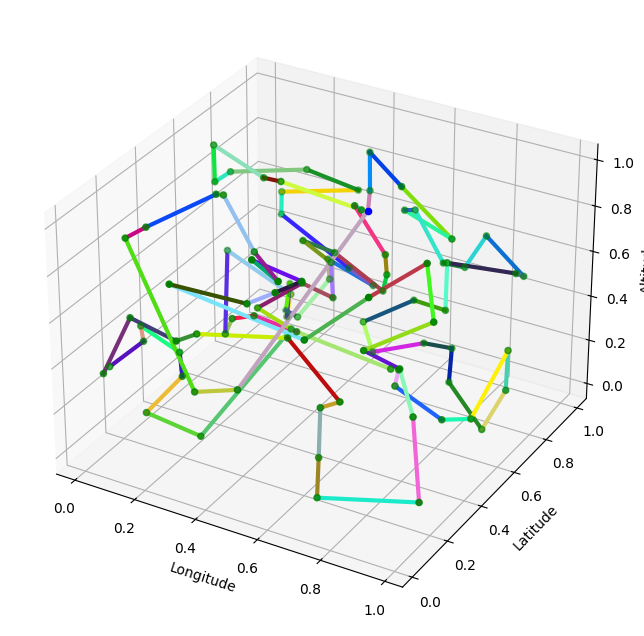

In [17]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def random_color() -> list:
    """
    This function generates a random color in RGB porcentage intensity.

    Returns:
    - list: A list with three random values between 0 and 1.
    """
    return [random.random(), random.random(), random.random()]


def plot_aco_route(cities: np.array, best_path: list):
    """
    This function plots the cities and the best path found by the ACO algorithm.

    Parameters:
    - cities (np.array): A list of cities with their coordinates.
    - best_path (list): The best path found by the ACO algorithm.
    """
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    for i in range(len(best_path) - 1):
        ax.plot(
            [cities[best_path[i], 0], cities[best_path[i + 1], 0]],  # x axis
            [cities[best_path[i], 1], cities[best_path[i + 1], 1]],  # y axis
            [cities[best_path[i], 2], cities[best_path[i + 1], 2]],  # z axis
            c=random_color(),
            linestyle="-",
            linewidth=3,
        )

    ax.plot(
        [cities[best_path[0], 0], cities[best_path[-1], 0]],
        [cities[best_path[0], 1], cities[best_path[-1], 1]],
        [cities[best_path[0], 2], cities[best_path[-1], 2]],
        c=random_color(),
        linestyle="-",
        linewidth=3,
    )

    ax.scatter(cities[0, 0], cities[0, 1], cities[0, 2], c="b", marker="o")
    ax.scatter(cities[1:, 0], cities[1:, 1], cities[1:, 2], c="g", marker="o")

    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    ax.set_zlabel("Altitude")
    plt.show()
print("Best path:", best_path)
print("Best path length:", best_path_length)
plot_aco_route(cities, best_path)

# Workshop 2 - System Analisys
## Observations and conclusions:

The purpose of this section of the document is to mention how each of the inputs of the system previously created to solve the salesman problem work, which is obtained as an output and some problems that were encountered during the development of the activity.

### Inputs

In the problem that we will address, different inputs are evident that influence the function implemented by the ant colony optimization algorithm, these are:
* Number of cities
* Number of ants
* Number of iterations
* Alpha parameter
* Beta parameter
* Evaporation rate of the pheromone 
* Quantity of pheromone per ant each time it passes along a path

#### Number of cities:
This input directly affects the complexity of the problem because the more cities there are, the more difficult it is to have a shorter route and in less time. Also it affects the time of execution of the algorithm and dirctly affects the probability of obtain the best path in extreme situations if there are less ants, because theese have more routes to travel,the latter complicating the possibility of the ants taking the shortest route.

#### Number of ants:
This input has a great impact on the implementation of the ACO because it allows more routes to be traveled, thus increasing the possibilities of obtaining the best path. However, increasing this value to the extreme can cause the ants be more susceptible to deviating by less efficient routes, which would cause a counterproductive effect to what we expected, thus being a value that must be chosen with great care depending on the situation to be treated.

#### Number of iterations:
This input largely influences the precision of the data that we obtain, since regardless of the number of ants or how much pheromone they leave where they pass, the more iterations are done, the more precise the data obtained will be since the possible paths are traveled more, leaving more pheromone for those who are more efficient. On the other hand, it also affects the execution time because the more iterations are done, the longer it will take to obtain the results since more trips have to be made.

#### Alpha parameter:
This input allows the ants to be influenced to make the decision of which route to take, mostly based on the pheromone left by the other ants. Increasing this value would mean that the ants rely more on the pheromone when making the decision than on distance or chance, so care must be taken because if this value is greatly increased it could cause them to take unwanted routes. as better roads, which we try to avoid by influencing this decision also by the distance to travel.

#### Beta parameter:
This input, like the alpha parameter, influences the ants' decision when choosing which path to follow, but in this case this parameter tells us how influenced the ants are by distance. Increasing this value would mean that the ants now make a decision more based on the distance between their current city and those around them, so increasing it inadvertently could cause the ants take the longest route, therefore like the alpha value, great care must be taken when defining the value of this parameter.

#### Evaporation rate of the pheromone:
This input establishes how long it takes for the pheromone to dissipate. This helps the iterations to be more efficient and the less pheromone a route has, the easier it is to discard it.Decreasing this value excessively could cause the algorithm to be inefficient since the pheromone would prevail for a very short time, so the most optimal routes would also be erased from the map more easily for each iteration, while increasing it excessively would also harm the efficiency of the algorithm. since the least efficient routes will have a greater chance of being chosen, which drastically affects the outputs of the code. Therefore, depending on the situation, an appropriate value should be chosen that favors the time in which the most optimal routes are preserved and the least optimal ones are discarded.

#### Quantity of pheromone per ant each time it passes along a path:
This input establishes how much pheromone each ant leaves for each path it travels, this allows the most optimal routes to be chosen in each case since the path that has the most pheromone is the one that in one way or another will influence the ants the most. Decreasing this input would increase the need to do more iterations, which would spend more time to find a more optimal solution, and increasing it excessively could mark less efficient routes, so like most of the inputs mentioned above, an appropriate value must be established depending on the situation in which it is used.

### Outputs
This program has one output that is the best path. In this case the best path is the sequence of cities that the ants find and like an extra we add the distance that this rout takes. Also we add a map wich shows in a 3D space the position of each city and the route obtained with the best path.

### Conclusions:
* The ACO is a great example of a swarm inteligence because it shows how a simple agent by itself can't realize a big work but using many agents and give them the correct instructions and restrictions, they can solve realy hard works
* An observation that we do is that the probability must to be calculated by a quotient because ther is a posibilty where the probability in some cases trows negative values
* The ACO is an elegant and organiced way to realize a brute force atak because we proof all the cases one per one but trying it quickly and simultaneously
* Is important concider all the inputs and the variables in a system because in this way we obtain the really information about how it works.